Using eotools 1.4.1 is necessary. 1.4.2 doesn't have compatibility. This notebook needs to be run on s3df.

Hint to run this notebook in s3df RSP environment:
```
[youtsumi@nb-youtsumi CompareRuns]$ git clone https://github.com/lsst-camera-dh/eotest.git
[youtsumi@nb-youtsumi CompareRuns]$ git checkout c2b1b3970190eae33baa202080f1531d7a0110c6
[youtsumi@nb-youtsumi CompareRuns]$ cat ~/notebooks/.user_setups 
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.
export EOTEST_DIR="/home/y/youtsumi/src/eotest"
export PYTHONPATH="${EOTEST_DIR}/python":${PYTHONPATH}
```

In [1]:
#https://github.com/lsst-camera-dh/eotest/tree/eaa965b3a66033d04d789974f0fd353912311be5/python/lsst/eotest/sensor
%matplotlib inline
import os
import glob
from astropy.io import fits
#from get_EO_analysis_results import get_EO_analysis_results
#from get_EO_analysis_files import get_EO_analysis_files

from lsst.eotest.sensor.MaskedCCD import MaskedCCD
import lsst.eotest.raft.raft_mosaic  as raft_mosaic
from lsst.eotest.sensor.EOTestPlots import *
import lsst.eotest.sensor.pylab_plotter as pylab_plotter
from astropy.visualization import (ZScaleInterval, MinMaxInterval, LinearStretch, LogStretch, 
                                   ImageNormalize)
import lsst.eotest.image_utils as imutils
import pylab
import matplotlib
import numpy







/home/y/youtsumi/src/eotest/python/lsst/eotest/sensor/flatPairTask.py:130: FutureWarning: Call to deprecated function (or staticmethod) timeMethod. (timeMethod has been replaced by lsst.utils.timer.timeMethod. Will be removed after v25.) -- Deprecated since version v24.
  def run(self, sensor_id, infiles, mask_files, gains, detrespfile=None,
/home/y/youtsumi/src/eotest/python/lsst/eotest/sensor/ptcTask.py:145: FutureWarning: Call to deprecated function (or staticmethod) timeMethod. (timeMethod has been replaced by lsst.utils.timer.timeMethod. Will be removed after v25.) -- Deprecated since version v24.
  def run(self, sensor_id, infiles, mask_files, gains, binsize=1,
/home/y/youtsumi/src/eotest/python/lsst/eotest/sensor/eperTask.py:92: FutureWarning: Call to deprecated function (or staticmethod) timeMethod. (timeMethod has been replaced by lsst.utils.timer.timeMethod. Will be removed after v25.) -- Deprecated since version v24.
  def run(self, infilename, nframes, amps, overscans

In [2]:
class Plotter:
    def __init__(self,interval=ZScaleInterval,stretch=LinearStretch,**kwargs):
        self.interval=interval
        self.stretch=stretch
        self.kwargs=kwargs
        self.win=plot_flat(**kwargs)
        self.annotates=[]
        for annotate in self.win.fig.findobj(matplotlib.text.Annotation):
            x,y=annotate.get_position()
            text=annotate.get_text()
            Y = 1.48-y if y>0.5 else 0.48-y
            self.annotates.append({"position": (x-0.02, Y) , "text": text})
        
        fh = fits.open(kwargs["outfile"])
        self.image = fh[0].data
#        self.run()

    def preprocess(self):
        pylab.clf()        
    
    def main(self):
        norm = ImageNormalize(self.image,
                          interval=self.interval(),
                          stretch=self.stretch())
        
        pylab.imshow(self.image,origin="lower",cmap=self.kwargs["cmap"],norm=norm)

        
    def postprocess(self,ampannotate=True):
        pylab.gca().set_xticks([])
        pylab.gca().set_yticks([])
        pylab.title(self.kwargs["title"])
        pylab.colorbar(label="ADU",orientation="vertical",shrink=0.5)
        if ampannotate:
            for annotate in self.annotates:
                pylab.annotate( annotate["text"], annotate["position"], xycoords='axes fraction' )
            for font in self.win.fig.findobj(matplotlib.text.Text):
                font.set_size(18)
        
#        pylab.tight_layout()

    def run(self,ampannotate=True):
        self.preprocess()
        self.main()
        self.postprocess(ampannotate)

In [3]:
basepath="/fs/ddn/sdf/group/lsst/camera/IandT/symlinks/LCA-10134_Cryostat/LCA-10134_Cryostat-0001"
runnum=13040
sensor = "R22_S22"

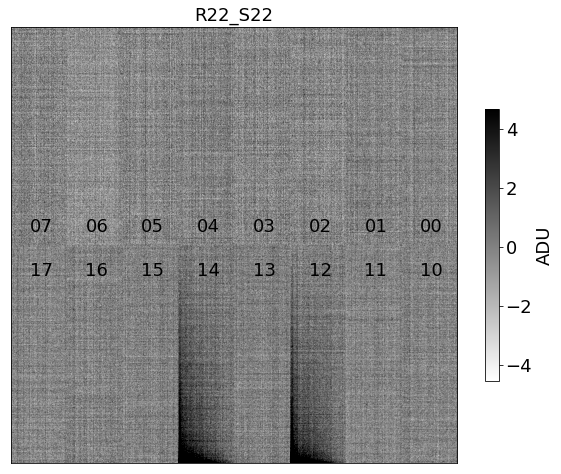

In [4]:
path="/fs/ddn/"+os.readlink(glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/105150/bias_bias_000")[0])

p=Plotter(
    infile=glob.glob(f"{path}/*{sensor}.fits")[0],
    nsig=5,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=sensor,
    bias_frame="rowcol",
    binsize=4,
    outfile="/dev/shm/out.fits"
)
p.run()

pylab.savefig("yellowcorner.pdf")

In [5]:
path

'/fs/ddn//sdf/group/lsst/camera/IandT/rawData/focal-plane/20211116/MC_C_20211116_000200'

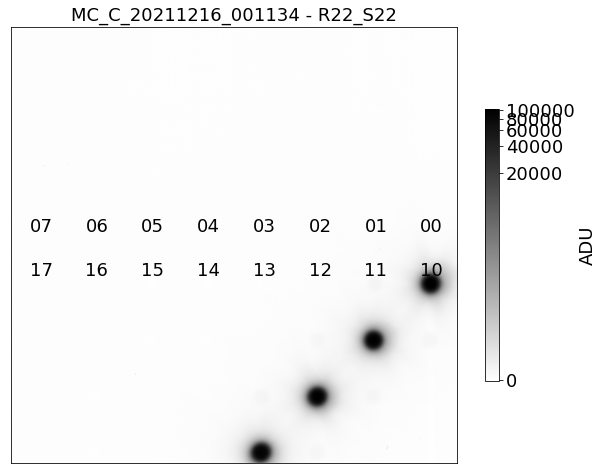

In [6]:
expid = "MC_C_20211216_001134"


p=Plotter(
    infile=glob.glob(f"/fs/ddn//sdf/group/lsst/camera/IandT/rawData/focal-plane/20211216/{expid}/*{sensor}.fits")[0],
    nsig=100,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    binsize=4,
    stretch=LogStretch,
    interval=MinMaxInterval,
    outfile="/dev/shm/out.fits"
)
p.run()


pylab.savefig("xtalk.pdf")

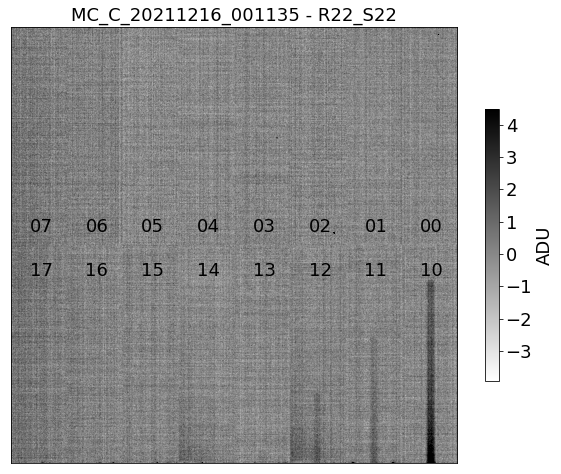

In [7]:
expid = "MC_C_20211216_001135"

p=Plotter(
    infile=glob.glob(f"/fs/ddn//sdf/group/lsst/camera/IandT/rawData/focal-plane/20211216/{expid}/*{sensor}.fits")[0],
    nsig=5,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    binsize=4,
    outfile="/dev/shm/out.fits"
)
p.run()

pylab.savefig("persistence.pdf")

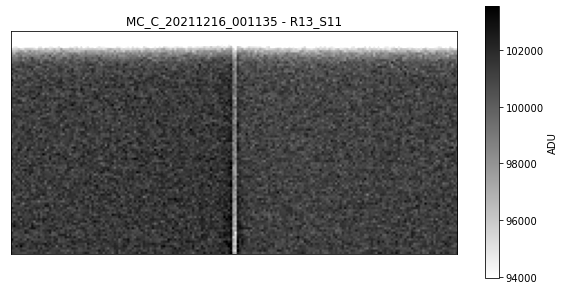

In [8]:
runnum=12624
imagename="flat_empty_SDSSi_191865.0_flat0_130"
sensor = "R13_S11"

path="/fs/ddn/"+os.readlink(glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}")[0])

p=Plotter(
    infile=glob.glob(f"{path}/*{sensor}.fits")[0],
    nsig=10,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    stretch=LinearStretch,
#    interval=MinMaxInterval,    
    binsize=1,
    outfile="/sdf/data/rubin/u/youtsumi/CompareRuns/out.fits"
)
ny,nx=p.image.shape
p.image=p.image[int(ny-100):int(ny),int(nx/2-100):int(nx/2+100)]
p.run(ampannotate=False)


pylab.savefig("tearing-divisadero-before.pdf")

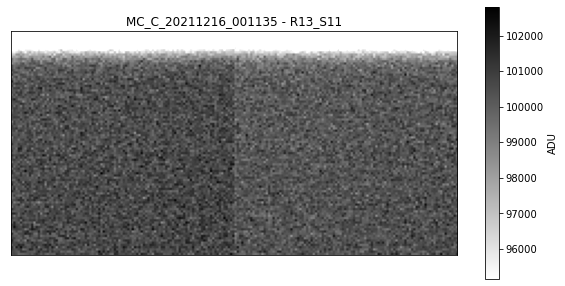

In [26]:
runnum=12639
imagename="flat_empty_SDSSi_191865.0_flat0_130"
sensor = "R13_S11"

path="/fs/ddn/"+os.readlink(glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}")[0])

p=Plotter(
    infile=glob.glob(f"{path}/*{sensor}.fits")[0],
    nsig=10,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    stretch=LinearStretch,
#    interval=MinMaxInterval,    
    binsize=1,
    outfile="/sdf/data/rubin/u/youtsumi/CompareRuns/out.fits"
)
ny,nx=p.image.shape
p.image=p.image[int(ny-100):int(ny),int(nx/2-100):int(nx/2+100)]
p.run(ampannotate=False)

pylab.savefig("tearing-divisadero-after.pdf")

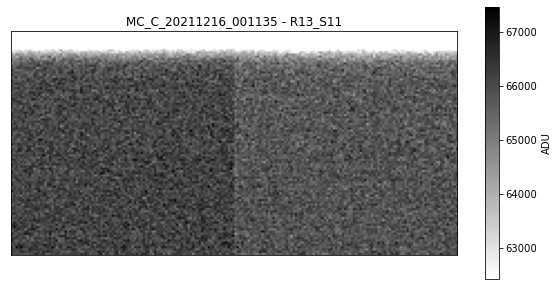

In [28]:
runnum=13137
imagename="flat_empty_SDSSi_104807.0_flat0_141"
sensor = "R13_S11"

path="/fs/ddn/"+os.readlink(glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}")[0])

p=Plotter(
    infile=glob.glob(f"{path}/*{sensor}.fits")[0],
    nsig=10,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    stretch=LinearStretch,
#    interval=MinMaxInterval,    
    binsize=1,
    outfile="/sdf/data/rubin/u/youtsumi/CompareRuns/out.fits"
)
ny,nx=p.image.shape
p.image=p.image[int(ny-100):int(ny),int(nx/2-100):int(nx/2+100)]
p.run(ampannotate=False)

pylab.savefig("tearing-divisadero-after.pdf")

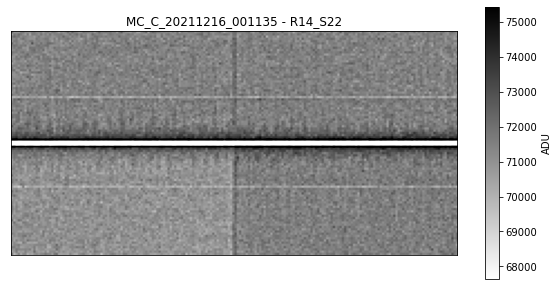

In [29]:
runnum=12624
imagename="flat_empty_SDSSi_191865.0_flat0_130"
sensor = "R14_S22"

path="/fs/ddn/"+os.readlink(glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}")[0])

p=Plotter(
    infile=glob.glob(f"{path}/*{sensor}.fits")[0],
    nsig=10,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    stretch=LinearStretch,
#    interval=MinMaxInterval,    
    binsize=1,
    outfile="/sdf/data/rubin/u/youtsumi/CompareRuns/out.fits"
)

ny,nx=p.image.shape
p.image=p.image[int(ny/2-50):int(ny/2+50),int(nx/2-100):int(nx/2+100)]
p.run(ampannotate=False)

pylab.savefig("tearing-classical-before.pdf")

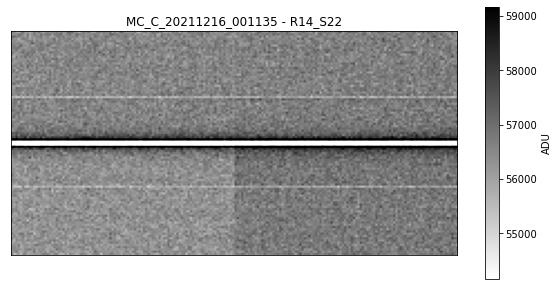

In [30]:
runnum=13137
imagename="flat_empty_SDSSi_104807.0_flat0_141"
sensor = "R14_S22"

path="/fs/ddn/"+os.readlink(glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}")[0])

p=Plotter(
    infile=glob.glob(f"{path}/*{sensor}.fits")[0],
    nsig=10,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    stretch=LinearStretch,
#    interval=MinMaxInterval,    
    binsize=1,
    outfile="/sdf/data/rubin/u/youtsumi/CompareRuns/out.fits"
)
ny,nx=p.image.shape
p.image=p.image[int(ny/2-50):int(ny/2+50),int(nx/2-100):int(nx/2+100)]
p.run(ampannotate=False)

pylab.savefig("tearing-classical-after.pdf")

In [12]:
p=raft_mosaic.make_raft_mosaic(
    { "R22_S22": glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/bias_bias_000/*R22_S22.fits")[0] }
)


IndexError: list index out of range